In [3]:
#!pip install keras

In [166]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [184]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [185]:
dataframe = pandas.read_csv("C:/Users/Administrator/python/18125760014_Bala_Vignesh_task2/camp.csv",usecols=[2])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [ 6.],
       [18.],
       [ 4.]], dtype=float32)

In [187]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [5.2055690e-05],
       [1.7698933e-04],
       [3.1233412e-05]], dtype=float32)

In [201]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2712 1337


In [161]:
dataset[100:(100+1),0]

array([1717.], dtype=float32)

In [189]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [190]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [191]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 7s - loss: 0.0027
Epoch 2/50
 - 5s - loss: 0.0025
Epoch 3/50
 - 6s - loss: 0.0025
Epoch 4/50
 - 6s - loss: 0.0025
Epoch 5/50
 - 6s - loss: 0.0025
Epoch 6/50
 - 6s - loss: 0.0025
Epoch 7/50
 - 6s - loss: 0.0025
Epoch 8/50
 - 6s - loss: 0.0025
Epoch 9/50
 - 6s - loss: 0.0025
Epoch 10/50
 - 6s - loss: 0.0024
Epoch 11/50
 - 6s - loss: 0.0024
Epoch 12/50
 - 6s - loss: 0.0024
Epoch 13/50
 - 6s - loss: 0.0024
Epoch 14/50
 - 6s - loss: 0.0024
Epoch 15/50
 - 7s - loss: 0.0024
Epoch 16/50
 - 6s - loss: 0.0024
Epoch 17/50
 - 6s - loss: 0.0024
Epoch 18/50
 - 6s - loss: 0.0024
Epoch 19/50
 - 5s - loss: 0.0024
Epoch 20/50
 - 5s - loss: 0.0024
Epoch 21/50
 - 6s - loss: 0.0024
Epoch 22/50
 - 6s - loss: 0.0024
Epoch 23/50
 - 6s - loss: 0.0024
Epoch 24/50
 - 6s - loss: 0.0024
Epoch 25/50
 - 6s - loss: 0.0024
Epoch 26/50
 - 6s - loss: 0.0024
Epoch 27/50
 - 6s - loss: 0.0024
Epoch 28/50
 - 6s - loss: 0.0024
Epoch 29/50
 - 6s - loss: 0.0024
Epoch 30/50
 - 6s - loss: 0.0024
Epoch 31/50
 - 6s -

In [192]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainY=trainY.reshape(2710,1)
testY=testY.reshape(1335,1)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


In [227]:
data=pandas.read_csv('camp.csv')
final_df=pandas.DataFrame()
#columns=['id','date','click_count']

In [228]:
lick_count':testPredict}
final_df['id']=data['Campaign id'].iloc[train_size:len(dataset)-2]
final_df['date']=data['Date'].iloc[train_size:len(dataset)-2]
final_df['click_count']=testPredict

In [249]:
anam=final_df[final_df.click_count>0.03]

In [250]:
anam=anam.sort_values(by='date')

We can easily identify the anomalies from this plot below, built on the predicted test data.

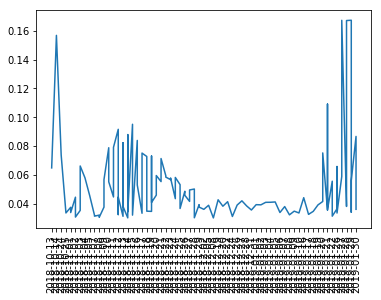

In [258]:
plt.plot(anam.date,anam.click_count)
plt.xticks(rotation=90)
plt.show()

In [234]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 0.03 RMSE
